# 상권 분석

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 한글 폰트 설정
plt.rc("font", family='NanumGothic')
plt.rc("axes", unicode_minus=False)

In [3]:
# 레티나 디스플레이로 폰트가 선명하게 표시되도록 함
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [4]:
dir_path="data/"
file_list=os.listdir(dir_path)
file_list

['소상공인시장진흥공단_상가(상권)정보_강원_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경기_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_경북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_광주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대구_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_대전_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_부산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_서울_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_세종_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_울산_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_인천_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_전북_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_제주_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충남_202012.csv',
 '소상공인시장진흥공단_상가(상권)정보_충북_202012.csv']

In [5]:
city=[['서울','seoul'],['부산','busan']]
for i in file_list:
    for j in range(0,len(city)):
        if city[j][0] in i:
            globals()['{}'.format(city[j][1])]=pd.read_csv(dir_path+i,sep="|")

In [6]:
seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,NaN,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1162010200101180033018722,NaN,서울특별시 관악구 신림로14길 3,151856,8839.0,NaN,NaN,NaN,126.937790,37.471190
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,...,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346572,17222727,현대기림,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,...,1120011400102760017009013,NaN,서울특별시 성동구 뚝섬로 366-72,133819,4775.0,NaN,NaN,NaN,127.051154,37.539464
346573,17222723,본현대미아점,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,...,1129013400100200001025204,현대백화점미아점,서울특별시 성북구 동소문로 315,136719,2730.0,NaN,5,NaN,127.028726,37.608392
346574,17219564,오피스알파,약장수,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,...,1130510300100360037035171,NaN,서울특별시 강북구 노해로17길 62-1,142872,1075.0,NaN,NaN,101,127.018733,37.640485
346575,17219761,앤클라인뉴욕핸드백,NaN,D,소매,D06,가방/신발/액세서리,D06A10,가방/가죽제품소매,G47430,...,1153010200105730000020642,NC백화점,서울특별시 구로구 구로중앙로 152,152715,8292.0,NaN,1,NaN,126.882409,37.501378


In [7]:
# 모든 컬럼이 표시되도록 max_columns의 수를 지정
pd.options.display.max_columns = len(seoul.columns)

In [8]:
seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17163092,도전최강달인왕만두,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11740,강동구,1174056000,고덕2동,1174010200,고덕동,1174010200206930000,1,대지,693,NaN,서울특별시 강동구 고덕동 693,117403124001,서울특별시 강동구 고덕로,333,NaN,1174010200102170000018014,고덕그라시움,서울특별시 강동구 고덕로 333,134082,5224.0,NaN,NaN,NaN,127.159471,37.556197
1,17120456,이때,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144071000,연남동,1144012400,연남동,1144012400203900067,1,대지,390,67.0,서울특별시 마포구 연남동 390-67,114404139119,서울특별시 마포구 동교로38안길,7,NaN,1144012400103900067027687,NaN,서울특별시 마포구 동교로38안길 7,121867,3982.0,NaN,NaN,NaN,126.924660,37.562176
2,17175350,L.A.D,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144066000,서교동,1144012000,서교동,1144012000203950112,1,대지,395,112.0,서울특별시 마포구 서교동 395-112,114404139571,서울특별시 마포구 잔다리로3안길,23,NaN,1144012000103950112010755,NaN,서울특별시 마포구 잔다리로3안길 23,121840,4043.0,NaN,NaN,NaN,126.919845,37.550689
3,17175311,제이씨에스푸드,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11620,관악구,1162066500,서림동,1162010200,신림동,1162010200201180033,1,대지,118,33.0,서울특별시 관악구 신림동 118-33,116204160502,서울특별시 관악구 신림로14길,3,NaN,1162010200101180033018722,NaN,서울특별시 관악구 신림로14길 3,151856,8839.0,NaN,NaN,NaN,126.937790,37.471190
4,22767534,BYC상신점,상신점,D,소매,D05,의복의류,D05A07,셔츠/내의/속옷,NaN,NaN,11,서울특별시,11710,송파구,1171053200,거여2동,1171011300,거여동,1171011300200360000,1,대지,36,NaN,서울특별시 송파구 거여동 36,117103123014,서울특별시 송파구 오금로,527,NaN,1171011300100360000022458,성암빌딩,서울특별시 송파구 오금로 527,138110,5768.0,NaN,1,NaN,127.147321,37.493054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346572,17222727,현대기림,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11200,성동구,1120065000,성수1가1동,1120011400,성수동1가,1120011400202760017,1,대지,276,17.0,서울특별시 성동구 성수동1가 276-17,112003103010,서울특별시 성동구 뚝섬로,366,72.0,1120011400102760017009013,NaN,서울특별시 성동구 뚝섬로 366-72,133819,4775.0,NaN,NaN,NaN,127.051154,37.539464
346573,17222723,본현대미아점,NaN,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11290,성북구,1129068500,길음2동,1129013400,길음동,1129013400200200001,1,대지,20,1.0,서울특별시 성북구 길음동 20-1,112903107003,서울특별시 성북구 동소문로,315,NaN,1129013400100200001025204,현대백화점미아점,서울특별시 성북구 동소문로 315,136719,2730.0,NaN,5,NaN,127.028726,37.608392
346574,17219564,오피스알파,약장수,D,소매,D10,건강/미용식품,D10A04,건강식품판매,G47216,건강보조식품 소매업,11,서울특별시,11305,강북구,1130563500,수유3동,1130510300,수유동,1130510300200360037,1,대지,36,37.0,서울특별시 강북구 수유동 36-37,113054124005,서울특별시 강북구 노해로17길,62,1.0,1130510300100360037035171,NaN,서울특별시 강북구 노해로17길 62-1,142872,1075.0,NaN,NaN,101,127.018733,37.640485
346575,17219761,앤클라인뉴욕핸드백,NaN,D,소매,D06,가방/신발/액세서리,D06A10,가방/가죽제품소매,G47430,가방 및 기타 가죽제품 소매업,11,서울특별시,11530,구로구,1153056000,구로5동,1153010200,구로동,1153010200205730000,1,대지,573,NaN,서울특별시 구로구 구로동 573,115303116005,서울특별시 구로구 구로중앙로,152,NaN,1153010200105730000020642,NC백화점,서울특별시 구로구 구로중앙로 152,152715,8292.0,NaN,1,NaN,126.882409,37.501378


In [9]:
busan.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17175332,정성밥상,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,26,부산광역시,26350,해운대구,2635051000,우1동,2635010500,우동,2635010500205520002,1,대지,552,2.0,부산광역시 해운대구 우동 552-2,263502006010,부산광역시 해운대구 해운대로,635,7.0,2635010500105520002023290,NaN,부산광역시 해운대구 해운대로 635-7,612819,48087.0,NaN,NaN,NaN,129.159641,35.164474
1,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,여관업,26,부산광역시,26110,중구,2611056000,부평동,2611012600,부평동4가,2611012600200250001,1,대지,25,1.0,부산광역시 중구 부평동4가 25-1,261104175163,부산광역시 중구 보수대로44번길,5,NaN,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074,48974.0,NaN,NaN,NaN,129.023668,35.100979
2,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,치킨 전문점,26,부산광역시,26260,동래구,2626052000,복산동,2626010500,복천동,2626010500201850000,1,대지,185,NaN,부산광역시 동래구 복천동 185,262604190058,부산광역시 동래구 동래로147번길,18,NaN,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020,47802.0,NaN,NaN,NaN,129.087156,35.205267
3,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,셔츠 및 기타 의복 소매업,26,부산광역시,26500,수영구,2650067000,남천2동,2650010500,남천동,2650010500201480004,1,대지,148,4.0,부산광역시 수영구 남천동 148-4,265003138005,부산광역시 수영구 광안해변로,100,NaN,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751,48305.0,NaN,NaN,20,129.115397,35.143770
4,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,26,부산광역시,26230,부산진구,2623074000,개금1동,2623011100,개금동,2623011100201740004,1,대지,174,4.0,부산광역시 부산진구 개금동 174-4,262304187020,부산광역시 부산진구 가야대로482번길,29,3.0,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813,47327.0,NaN,NaN,NaN,129.024938,35.151645


### 인덱스 정보 보기

In [10]:
print("seoul : {}".format(seoul.index))
print("busan : {}".format(busan.index))

seoul : RangeIndex(start=0, stop=346577, step=1)
busan : RangeIndex(start=0, stop=141954, step=1)


### 컬럼명 보기

In [11]:
seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

# 결측치 확인하기

In [12]:
import missingno as msno
True==1

True

## 서울 결측치 시각화

<AxesSubplot:>

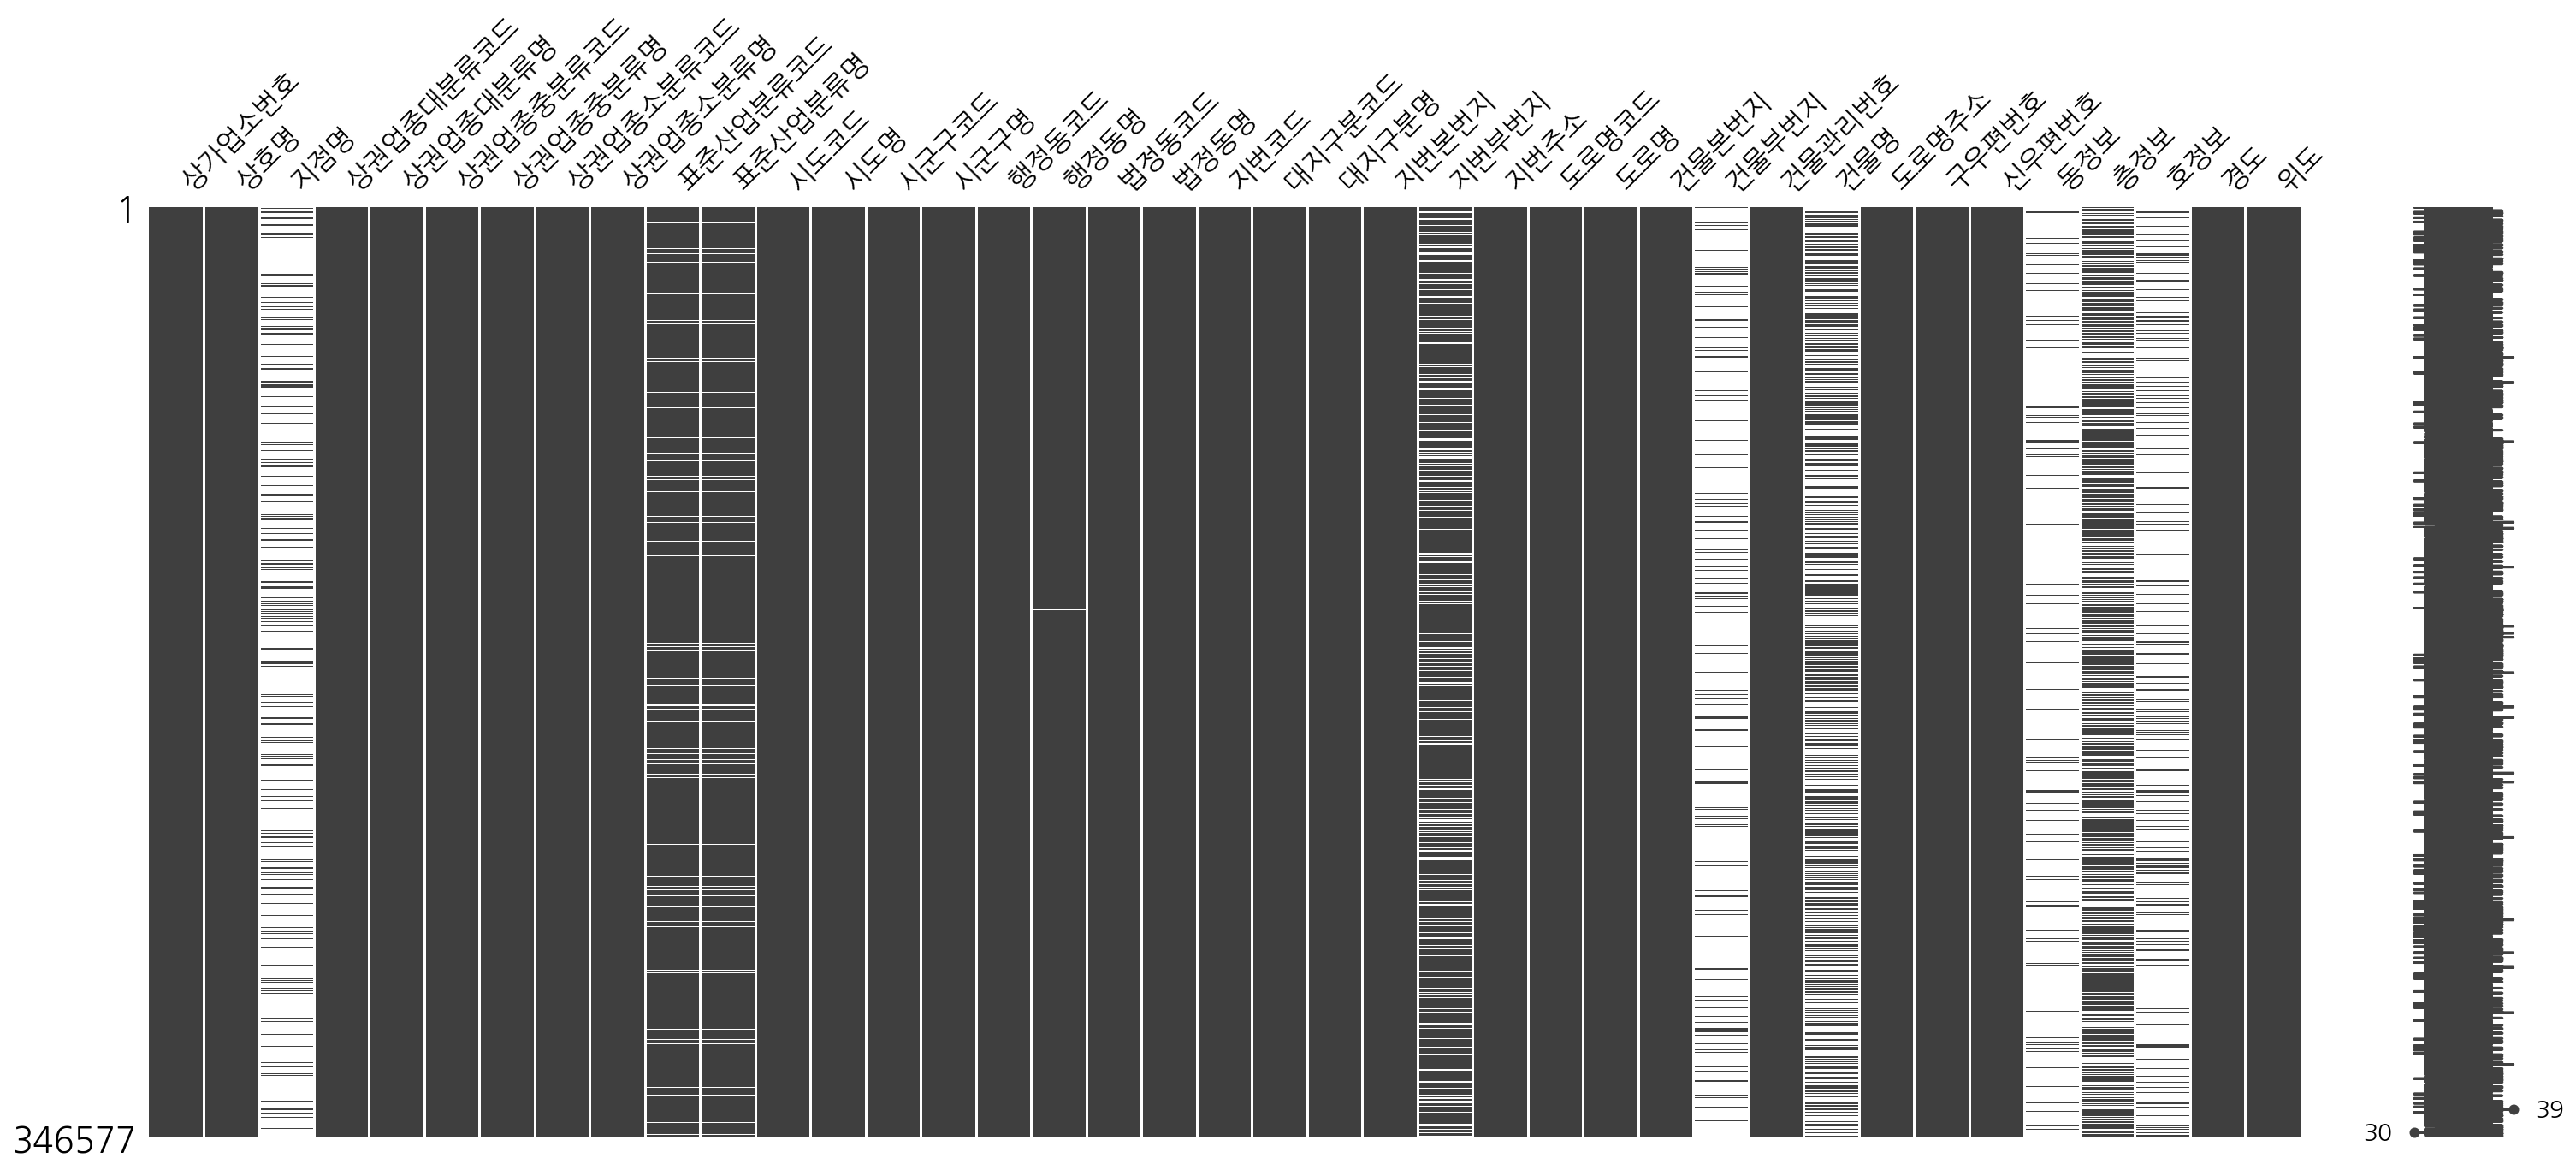

In [13]:
msno.matrix(seoul)

+ 하얀 부분이 결측치

<AxesSubplot:>

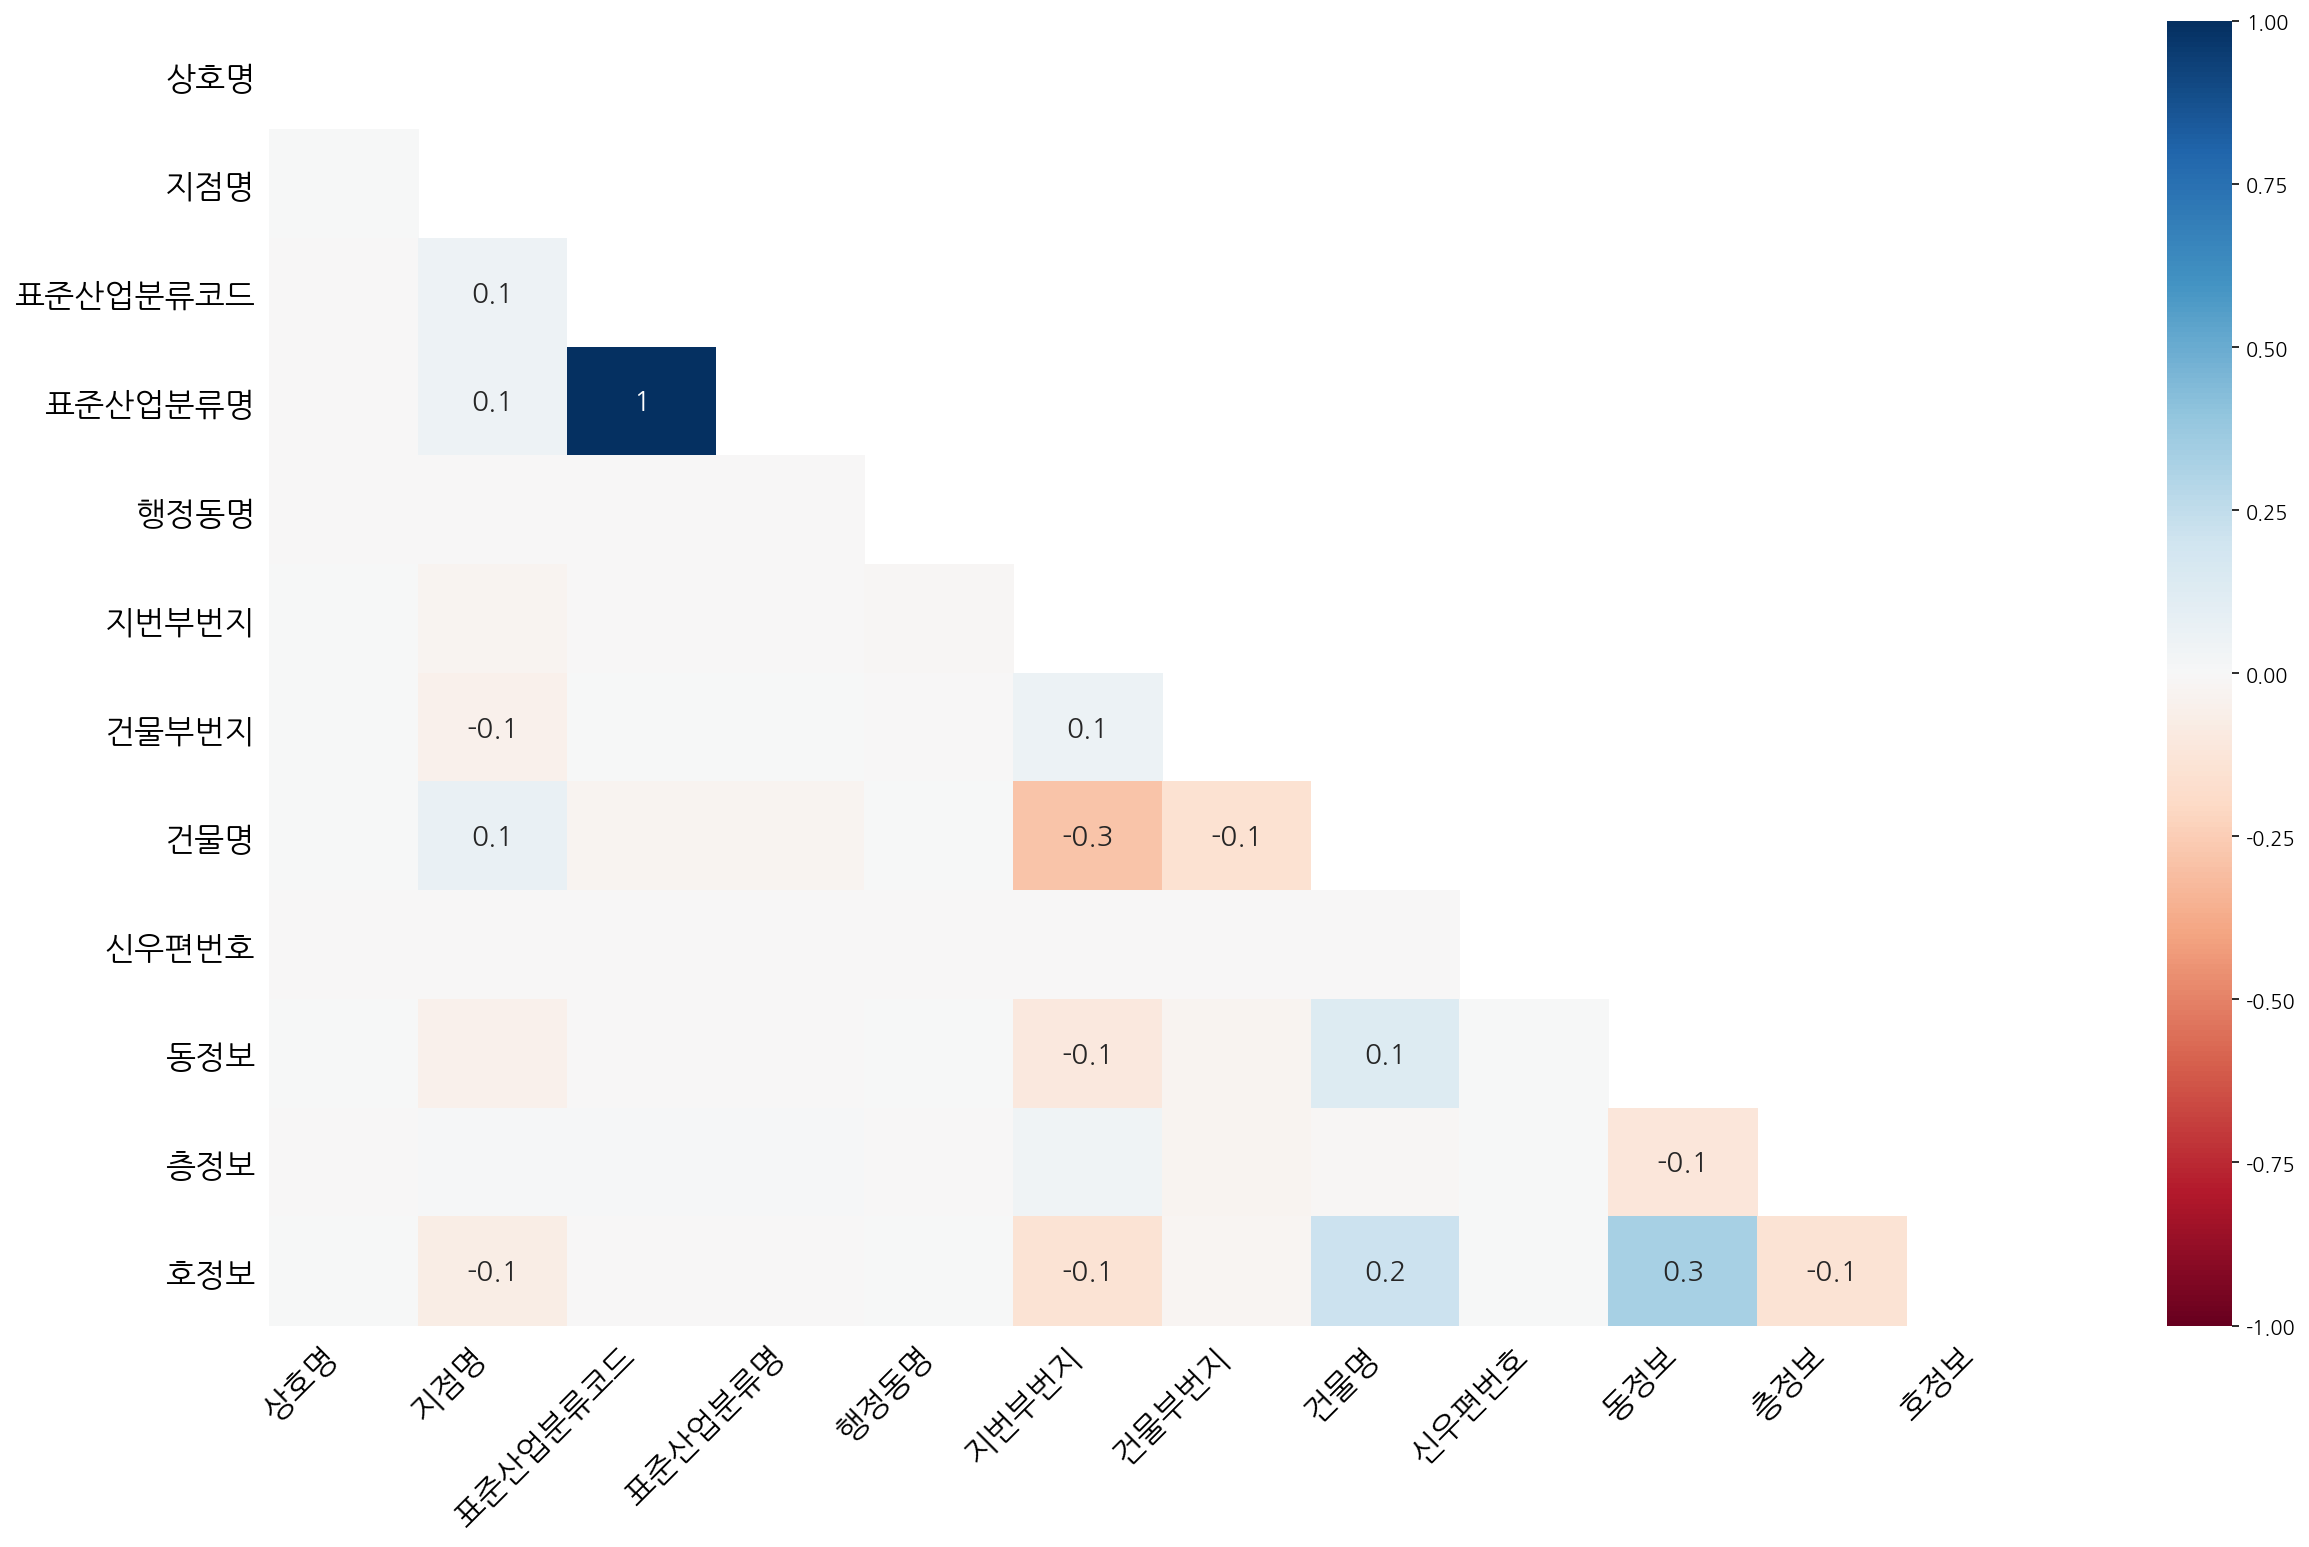

In [14]:
msno.heatmap(seoul)

<AxesSubplot:>

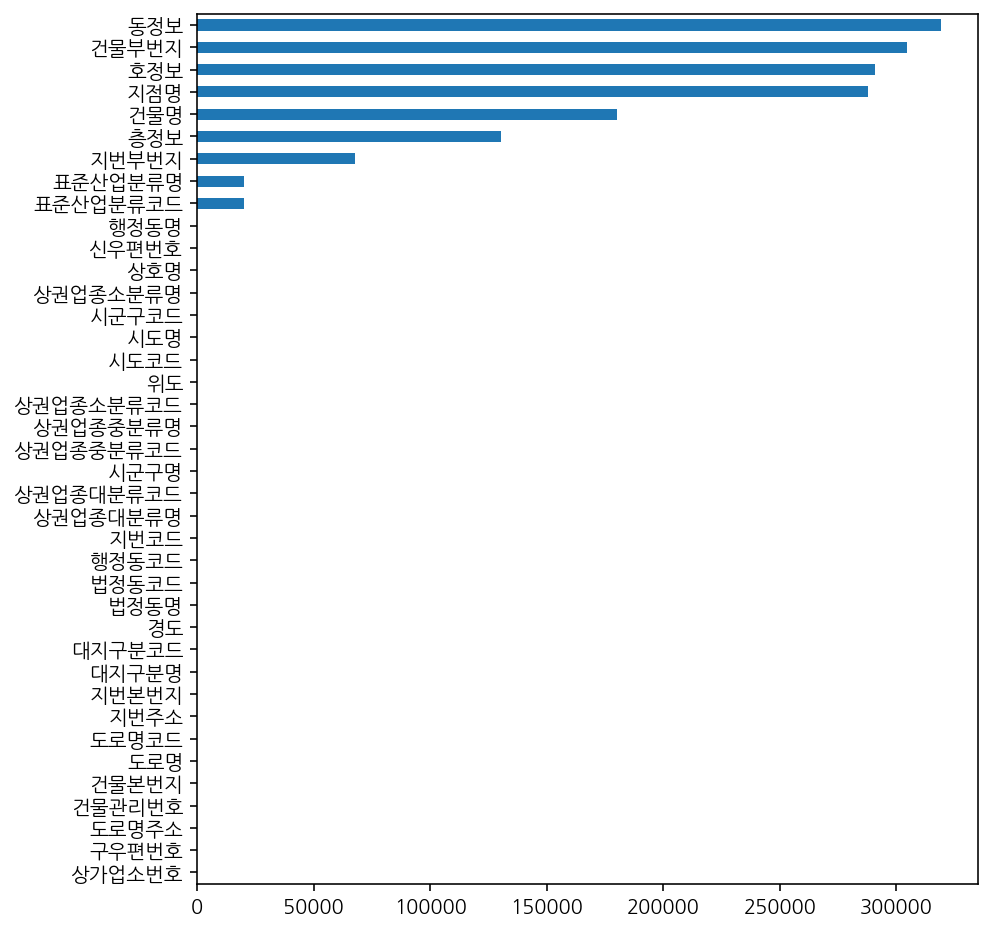

In [15]:
n1=seoul.isnull().sum()
n1.sort_values().plot.barh(figsize=(7, 8))

## 부산 결측치 시각화

<AxesSubplot:>

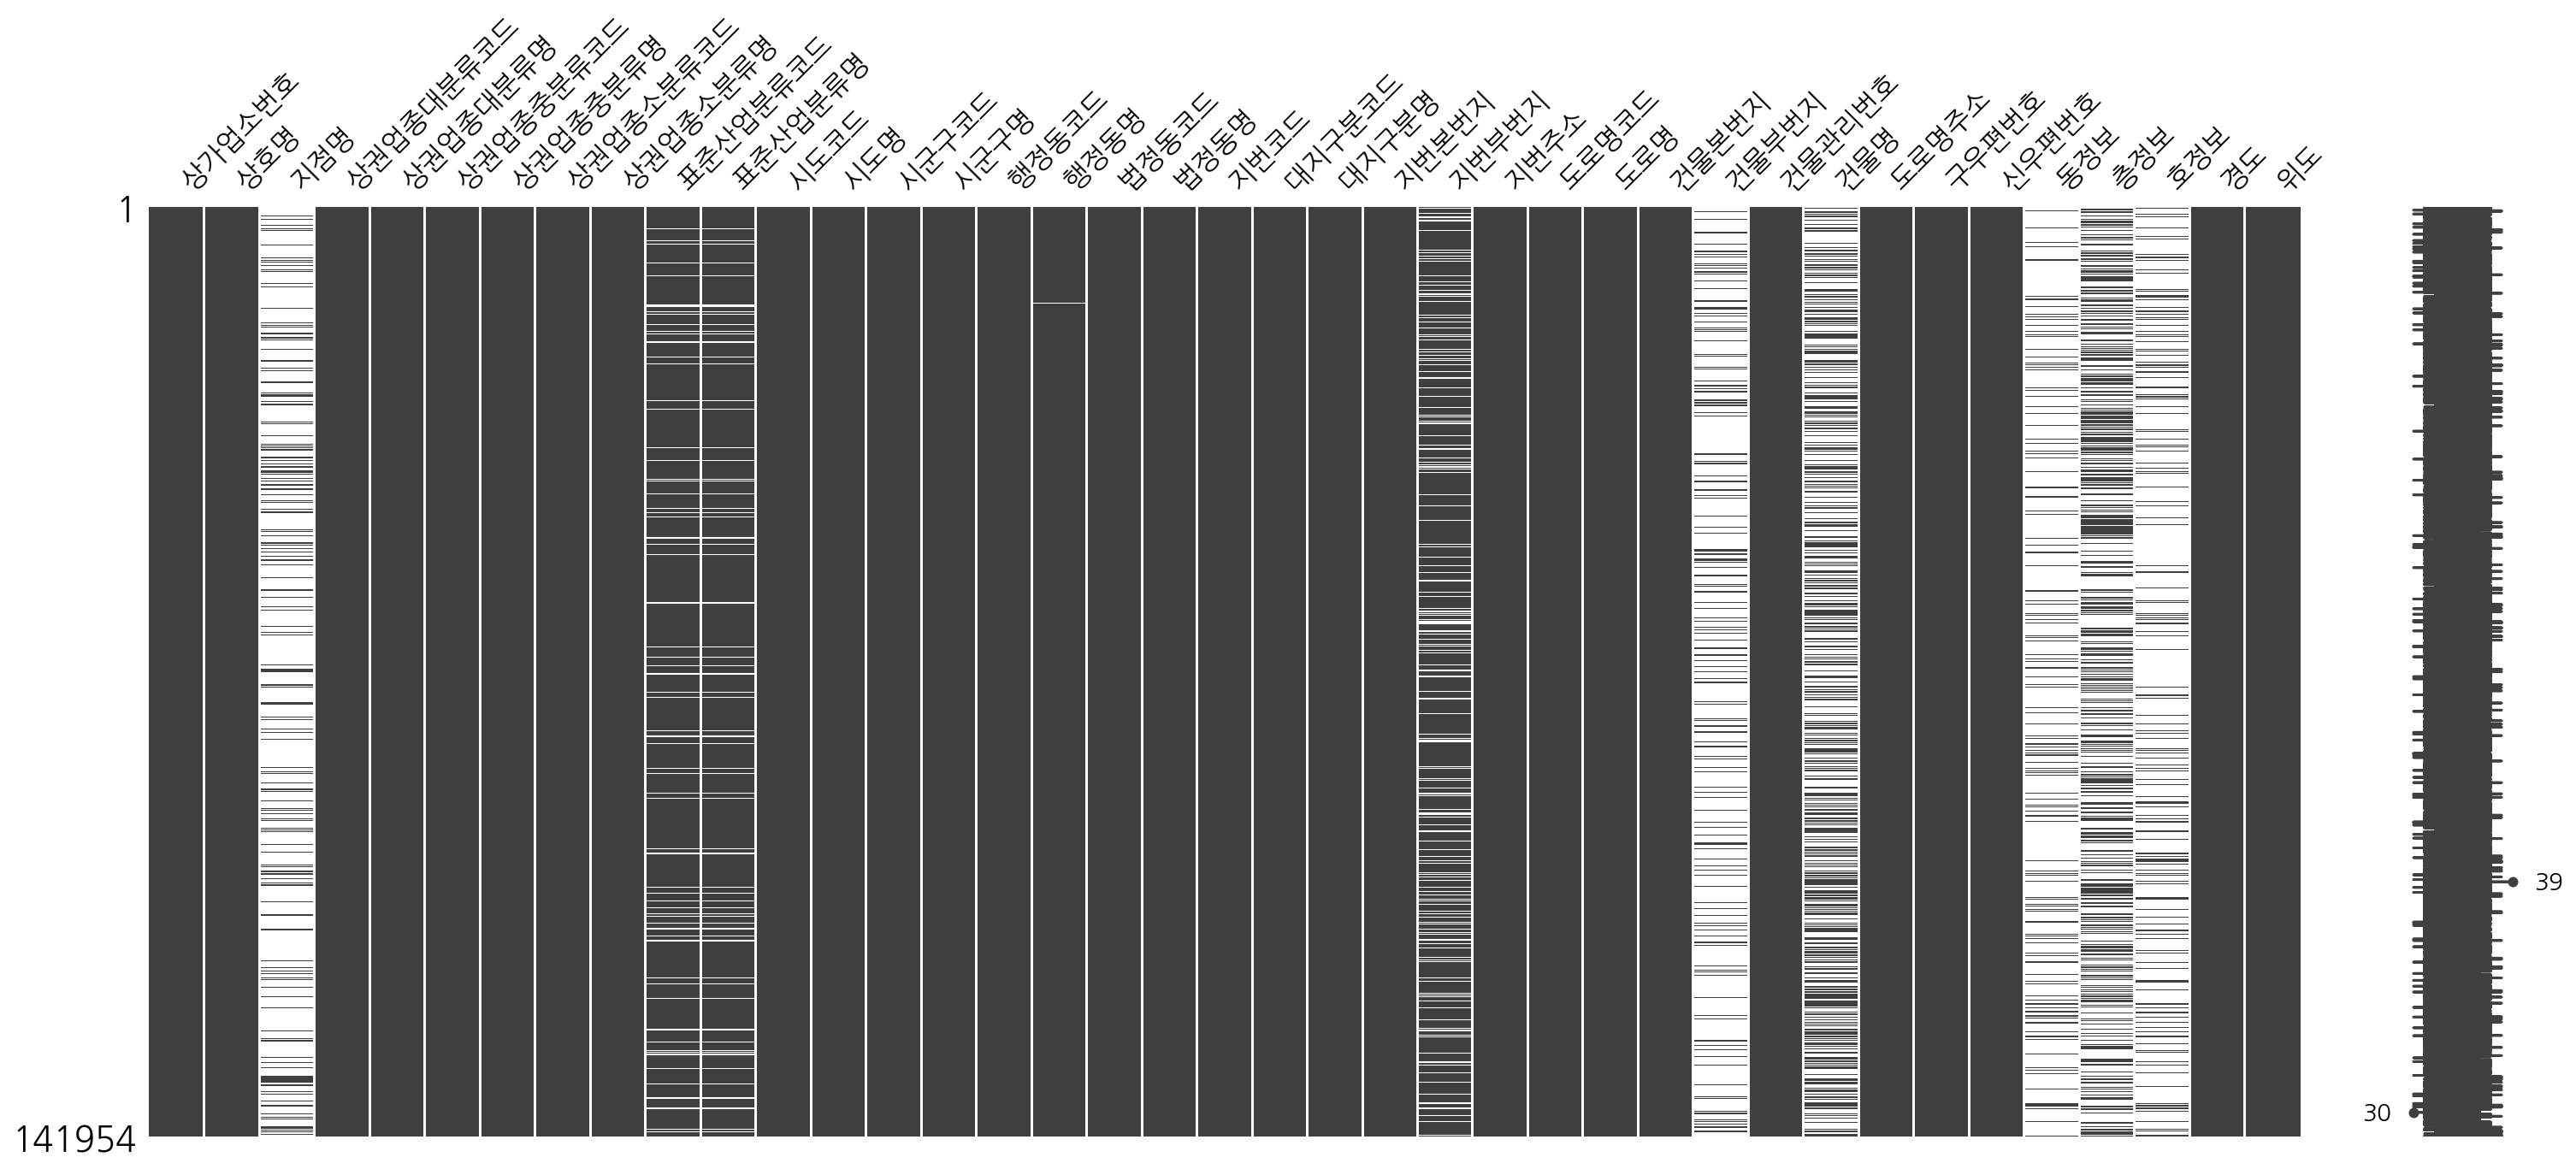

In [16]:
msno.matrix(busan)

<AxesSubplot:>

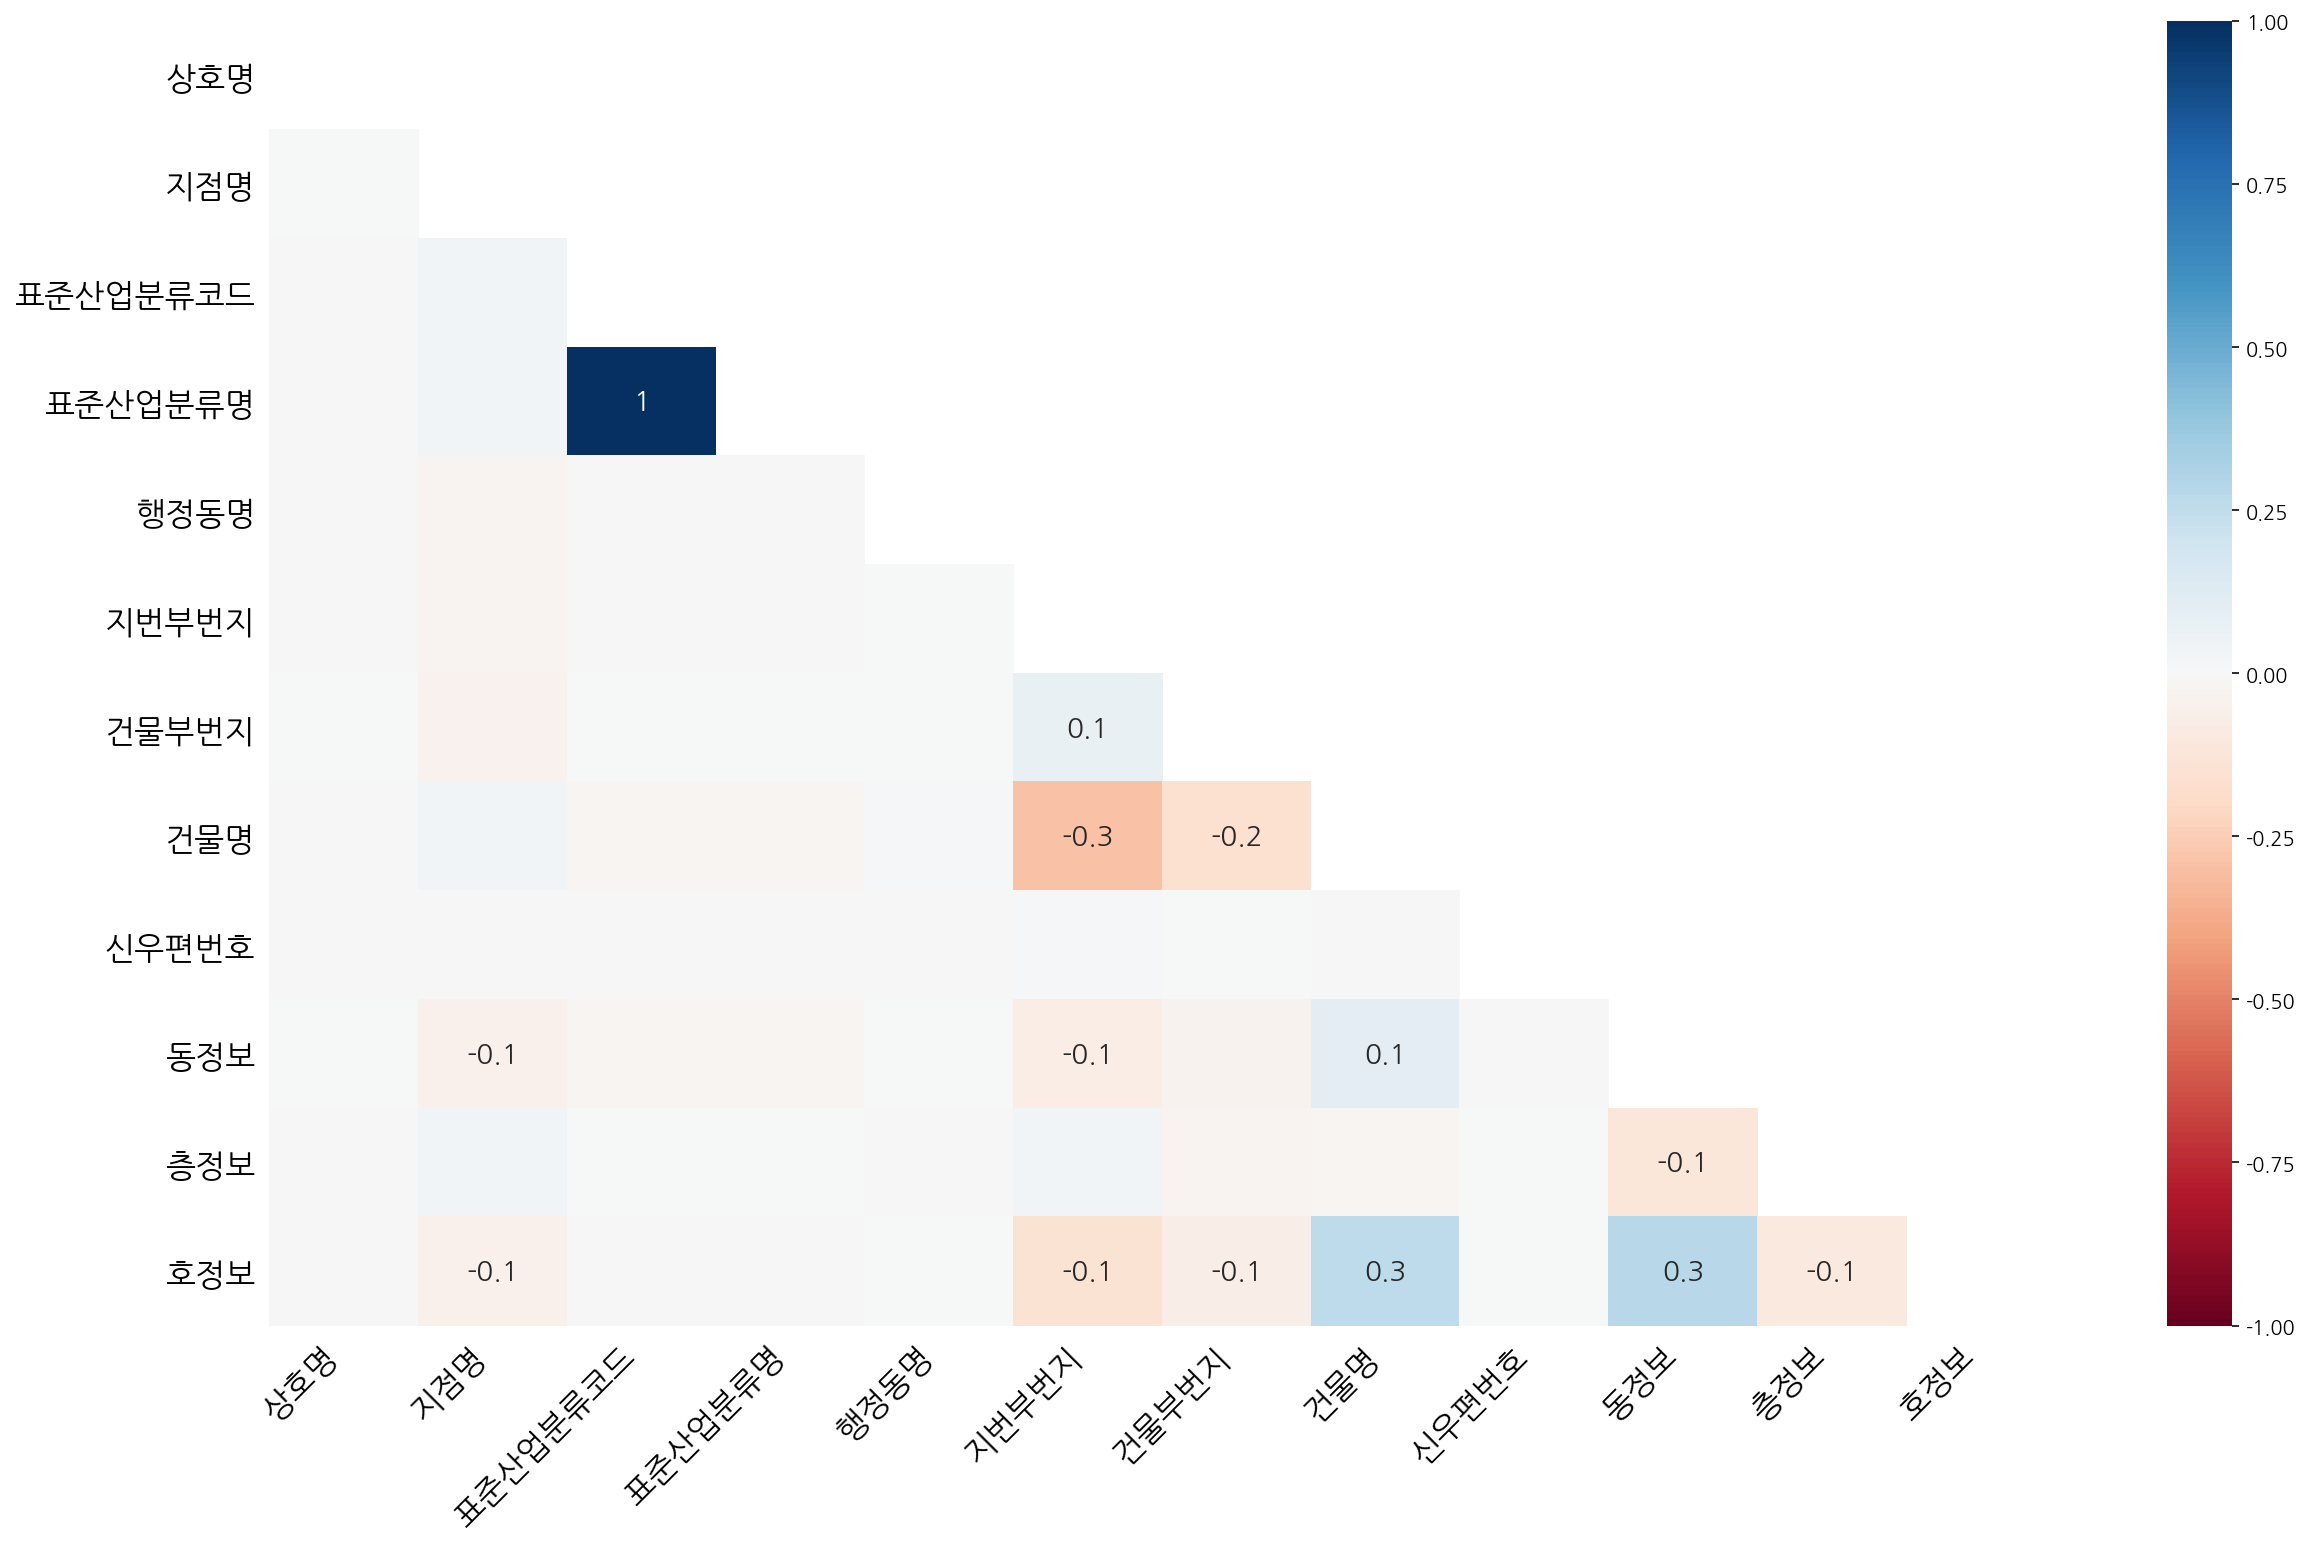

In [17]:
msno.heatmap(busan)

<AxesSubplot:>

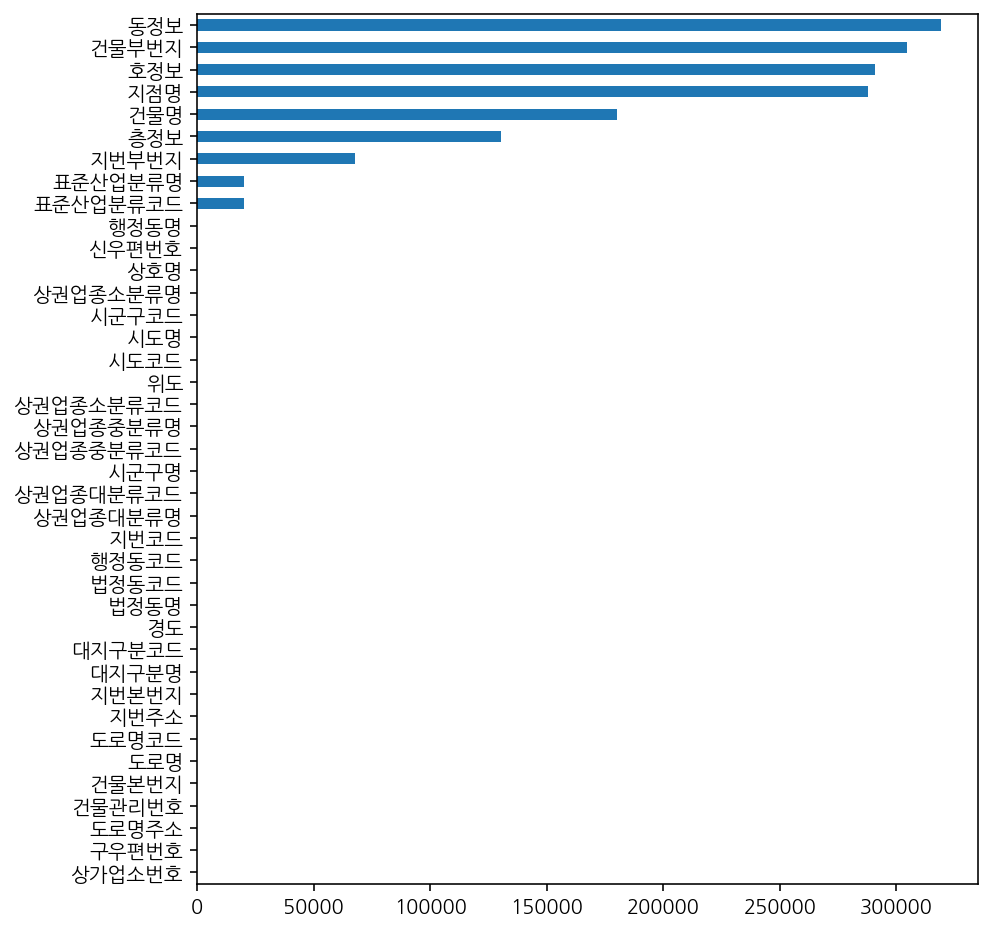

In [18]:
n2=seoul.isnull().sum()
n2.sort_values().plot.barh(figsize=(7, 8))

## 결측치가 많은 컬럼이나 사용하지 않는 컬럼 제거

### 결측치가 너무 많은 컬럼 제거

In [19]:
# sort_values 를 통해 결측치가 많은 데이터를 위에서 9개 가져와서 not_use 변수로 저장
# not_use 변수에 담긴 인덱스값만 추출해서 not_use_col 변수로 저장
not_use = n1.sort_values(ascending=False).head(9)
not_use_col = not_use.index
not_use_col

Index(['동정보', '건물부번지', '호정보', '지점명', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명'],
      dtype='object')

In [20]:
# 사용하지 않는 컬럼을 제거
seoul = seoul.drop(not_use_col, axis=1)
busan = busan.drop(not_use_col, axis=1)

### 사용하지 않는 컬럼 제거

In [21]:
# 컬럼명을 전처리 하기 위해 cols 라는 변수에 저장
cols = seoul.columns
cols

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [22]:
# 컬럼명에 "코드", "번호"가 있지만 분석에 필요하지 않기 때문에 
# '코드'와 '번호'를 포함하고 있는 컬럼 찾아와서 cols_code 라는 변수에 저장
cols_code = cols[cols.str.contains("코드|번호")]
cols_code

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '시도코드', '시군구코드',
       '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [23]:
# "코드", "번호" 가 들어가는 컬럼명만 drop으로 데이터프레임에서 제거
seoul = seoul.drop(cols_code, axis=1)
busan = busan.drop(cols_code, axis=1)

In [24]:
seoul

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,서울특별시 강동구 고덕로 333,127.159471,37.556197
1,이때,음식,한식,한식/백반/한정식,서울특별시,마포구,연남동,연남동,대지,390,서울특별시 마포구 연남동 390-67,서울특별시 마포구 동교로38안길,7,서울특별시 마포구 동교로38안길 7,126.924660,37.562176
2,L.A.D,음식,한식,한식/백반/한정식,서울특별시,마포구,서교동,서교동,대지,395,서울특별시 마포구 서교동 395-112,서울특별시 마포구 잔다리로3안길,23,서울특별시 마포구 잔다리로3안길 23,126.919845,37.550689
3,제이씨에스푸드,음식,한식,한식/백반/한정식,서울특별시,관악구,서림동,신림동,대지,118,서울특별시 관악구 신림동 118-33,서울특별시 관악구 신림로14길,3,서울특별시 관악구 신림로14길 3,126.937790,37.471190
4,BYC상신점,소매,의복의류,셔츠/내의/속옷,서울특별시,송파구,거여2동,거여동,대지,36,서울특별시 송파구 거여동 36,서울특별시 송파구 오금로,527,서울특별시 송파구 오금로 527,127.147321,37.493054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346572,현대기림,소매,건강/미용식품,건강식품판매,서울특별시,성동구,성수1가1동,성수동1가,대지,276,서울특별시 성동구 성수동1가 276-17,서울특별시 성동구 뚝섬로,366,서울특별시 성동구 뚝섬로 366-72,127.051154,37.539464
346573,본현대미아점,소매,건강/미용식품,건강식품판매,서울특별시,성북구,길음2동,길음동,대지,20,서울특별시 성북구 길음동 20-1,서울특별시 성북구 동소문로,315,서울특별시 성북구 동소문로 315,127.028726,37.608392
346574,오피스알파,소매,건강/미용식품,건강식품판매,서울특별시,강북구,수유3동,수유동,대지,36,서울특별시 강북구 수유동 36-37,서울특별시 강북구 노해로17길,62,서울특별시 강북구 노해로17길 62-1,127.018733,37.640485
346575,앤클라인뉴욕핸드백,소매,가방/신발/액세서리,가방/가죽제품소매,서울특별시,구로구,구로5동,구로동,대지,573,서울특별시 구로구 구로동 573,서울특별시 구로구 구로중앙로,152,서울특별시 구로구 구로중앙로 152,126.882409,37.501378


In [25]:
busan

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,도로명주소,경도,위도
0,정성밥상,음식,한식,한식/백반/한정식,부산광역시,해운대구,우1동,우동,대지,552,부산광역시 해운대구 우동 552-2,부산광역시 해운대구 해운대로,635,부산광역시 해운대구 해운대로 635-7,129.159641,35.164474
1,미광장,숙박,모텔/여관/여인숙,모텔/여관/여인숙,부산광역시,중구,부평동,부평동4가,대지,25,부산광역시 중구 부평동4가 25-1,부산광역시 중구 보수대로44번길,5,부산광역시 중구 보수대로44번길 5,129.023668,35.100979
2,BHC치킨,음식,닭/오리요리,후라이드/양념치킨,부산광역시,동래구,복산동,복천동,대지,185,부산광역시 동래구 복천동 185,부산광역시 동래구 동래로147번길,18,부산광역시 동래구 동래로147번길 18,129.087156,35.205267
3,스텔라,소매,의복의류,일반의류,부산광역시,수영구,남천2동,남천동,대지,148,부산광역시 수영구 남천동 148-4,부산광역시 수영구 광안해변로,100,부산광역시 수영구 광안해변로 100,129.115397,35.143770
4,도란도란,음식,한식,한식/백반/한정식,부산광역시,부산진구,개금1동,개금동,대지,174,부산광역시 부산진구 개금동 174-4,부산광역시 부산진구 가야대로482번길,29,부산광역시 부산진구 가야대로482번길 29-3,129.024938,35.151645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141949,비에스마트,소매,종합소매점,수퍼마켓,부산광역시,수영구,망미1동,망미동,대지,813,부산광역시 수영구 망미동 813-13,부산광역시 수영구 망미로22번길,75,부산광역시 수영구 망미로22번길 75,129.100584,35.170857
141950,행복한마트,소매,종합소매점,수퍼마켓,부산광역시,기장군,일광면,일광면,대지,810,부산광역시 기장군 일광면 삼성리 810,부산광역시 기장군 일광면 해빛5로,14,부산광역시 기장군 일광면 해빛5로 14,129.220741,35.260185
141951,24시간의신화,음식,한식,한식/백반/한정식,부산광역시,연제구,연산8동,연산동,대지,367,부산광역시 연제구 연산동 367-32,부산광역시 연제구 과정로,288,부산광역시 연제구 과정로 288,129.096057,35.188529
141952,현대헬스케어,소매,건강/미용식품,건강식품판매,부산광역시,사하구,괴정4동,괴정동,대지,1119,부산광역시 사하구 괴정동 1119-3,부산광역시 사하구 낙동대로,332,부산광역시 사하구 낙동대로 332,128.980941,35.100503


# 분석